## Step-1: Importing Data

In [1167]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [1168]:
import pandas as pd
import numpy as np

In [1169]:
bikesharing = pd.read_csv('day.csv')

In [1170]:
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1171]:
bikesharing.shape

(730, 16)

In [1172]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1173]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step-2: Understanding Data

#### Drop columns not used for analysis
Below columns are irrelevant based on their definitions below. So they can be removed from the analysis.
- instant: record index
- dteday : date
- casual: count of casual users
- registered: count of registered users

In [1174]:
bikesharing.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [1175]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [1176]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1177]:
# Checking unique values for all columns

bikesharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [1178]:
# Categorical Variables

cat_var = ['season', 'yr', 'mnth','holiday','weekday','workingday', 'weathersit']


In [1179]:
# Numerical variables

num_var = ['temp', 'atemp','hum','windspeed','cnt']

In [1180]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1181]:
#changing categorical data which were primarily numeric to more meaningful one
bikesharing.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bikesharing.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bikesharing.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

bikesharing.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

bikesharing.workingday.replace({0: 'No', 1: 'Yes'},inplace = True)

bikesharing.yr.replace({0: '2018', 1: '2019'}, inplace=True)

bikesharing.holiday.replace({0: 'No', 1: 'Yes'}, inplace=True)

bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,jan,No,sat,No,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,jan,No,sun,No,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,jan,No,mon,Yes,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,jan,No,tue,Yes,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,jan,No,wed,Yes,good,9.305237,11.46350,43.6957,12.522300,1600


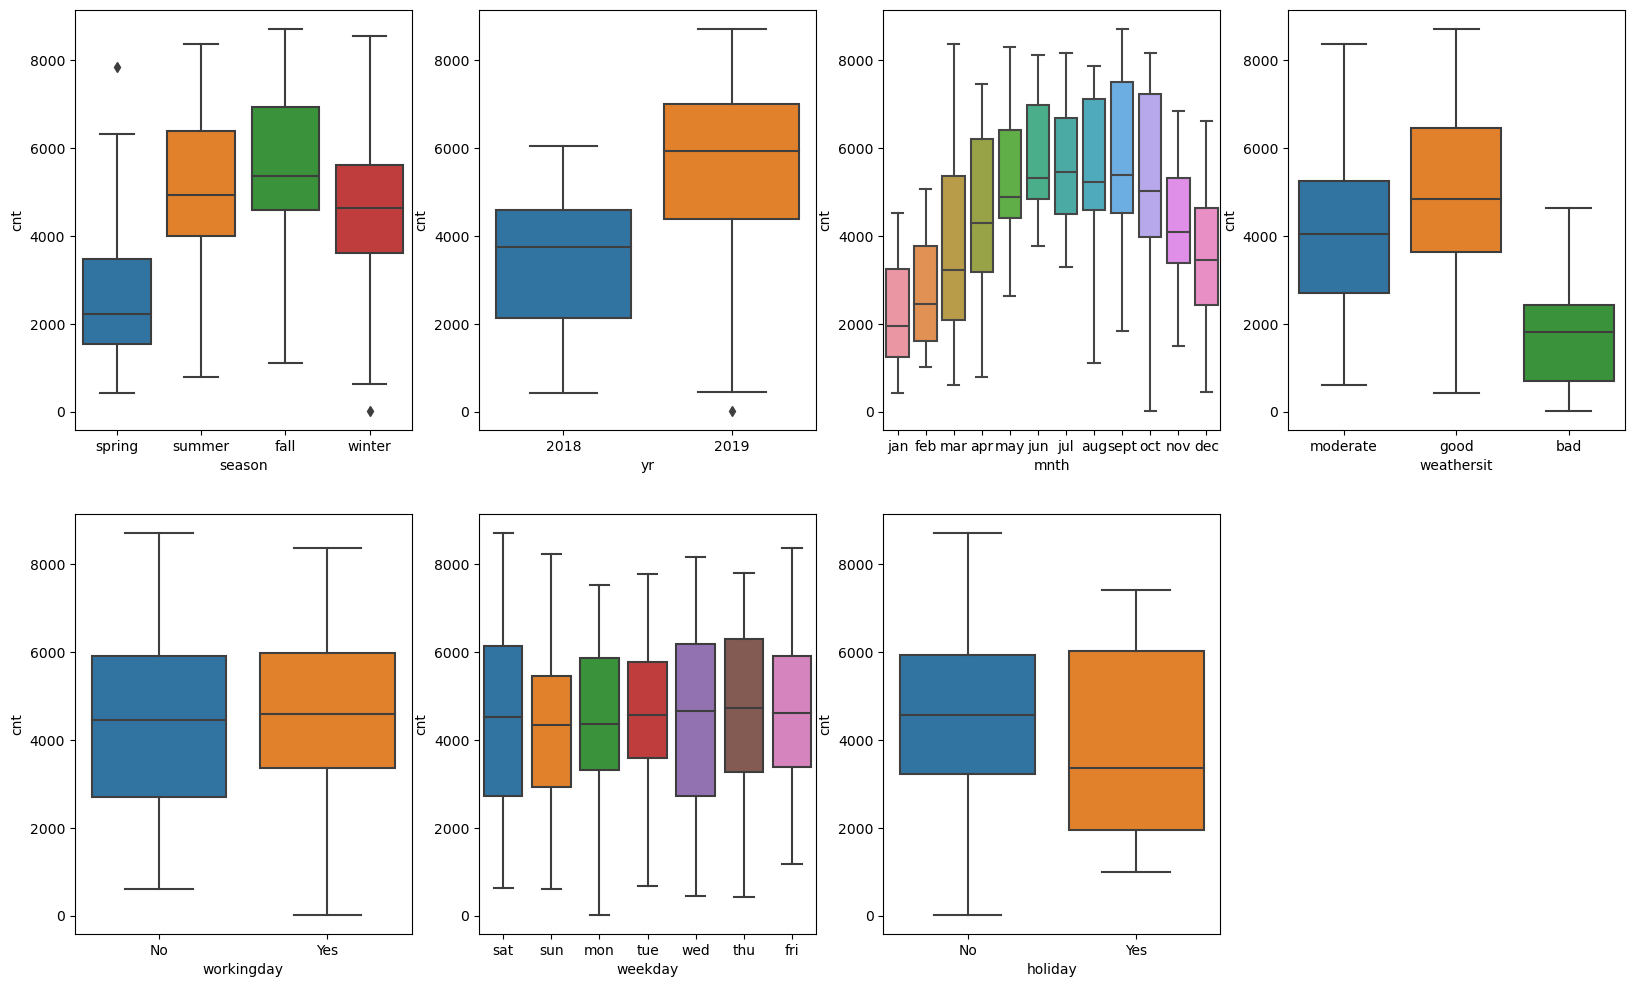

In [1182]:
#Visulaizing the categorical variables ('season', 'yr', 'mnth','holiday','weekday','workingday', 'weathersit')


plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikesharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bikesharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikesharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikesharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikesharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikesharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikesharing)
plt.show()

In [1183]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2000x1500 with 0 Axes>

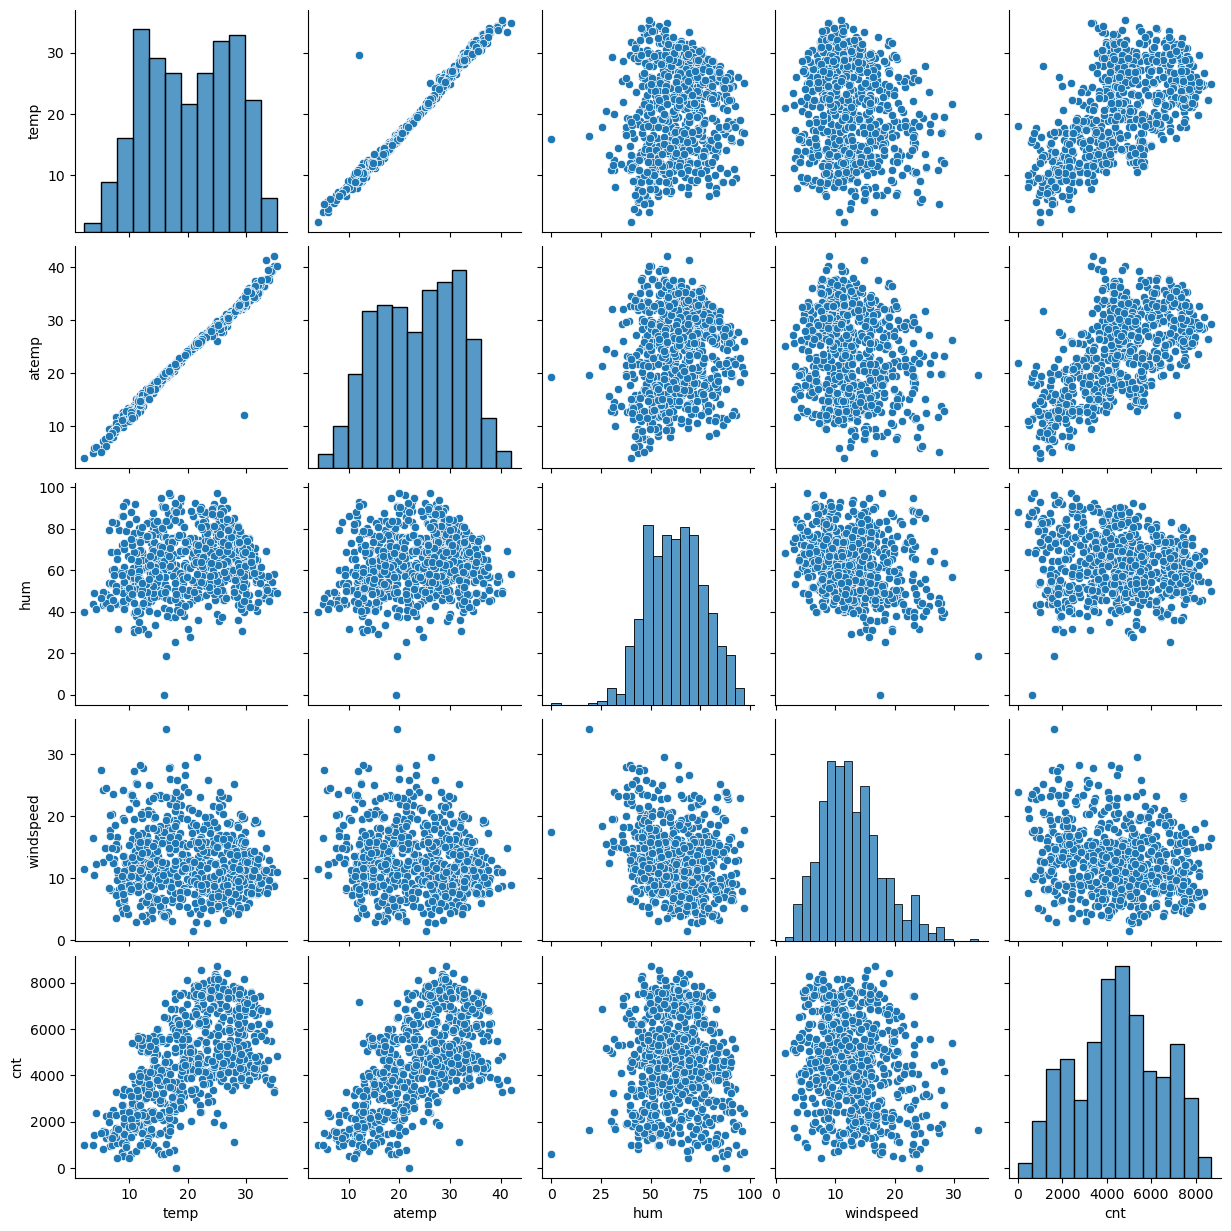

In [1184]:
# Visualizing Data 

plt.figure(figsize=(20,15))
sns.pairplot(bikesharing)
plt.show()

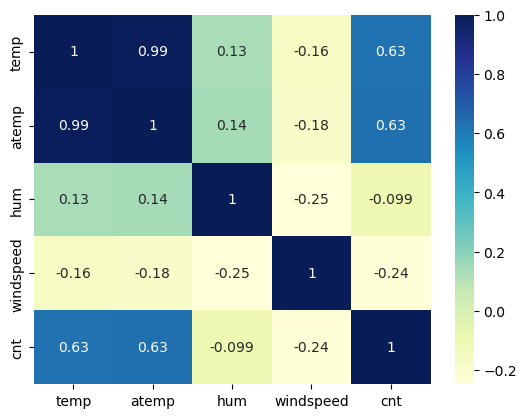

In [1185]:
sns.heatmap(bikesharing.corr(),cmap="YlGnBu",annot=True)
plt.show()

## Step-3: Data Preparation

In [1186]:
# Check unique values for each columns

bikesharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [1187]:
bikesharing.holiday.value_counts()

No     709
Yes     21
Name: holiday, dtype: int64

In [1188]:
bikesharing.workingday.value_counts()

Yes    499
No     231
Name: workingday, dtype: int64

In [1189]:
# convert 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

# List of variables to map

varlist =  ['holiday', 'workingday']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
bikesharing[varlist] = bikesharing[varlist].apply(binary_map)

# Convert year to binary
bikesharing.yr.replace({'2018': 0, '2019': 1}, inplace=True)

In [1190]:
bikesharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

In [1191]:
bikesharing.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [1192]:
# Creating dummy variables for all non binary categorical data

bikesharing = pd.get_dummies(data=bikesharing,columns=["season","mnth","weekday"],drop_first=True)
bikesharing = pd.get_dummies(data=bikesharing,columns=["weathersit"])


In [1193]:
bikesharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


In [1194]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    uint8  
 9   season_summer        730 non-null    uint8  
 10  season_winter        730 non-null    uint8  
 11  mnth_aug             730 non-null    uint8  
 12  mnth_dec             730 non-null    uint8  
 13  mnth_feb             730 non-null    uint8  
 14  mnth_jan             730 non-null    uint8  
 15  mnth_jul             730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [1195]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(bikesharing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

In [1196]:
from sklearn.preprocessing import MinMaxScaler

In [1197]:
scaler = MinMaxScaler()

In [1198]:
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [1199]:
# Apply scaler() to all the columns except the 'categorical variables and dummy variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [1200]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,1,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1


In [1201]:
y_train = df_train.pop('cnt')
X_train = df_train

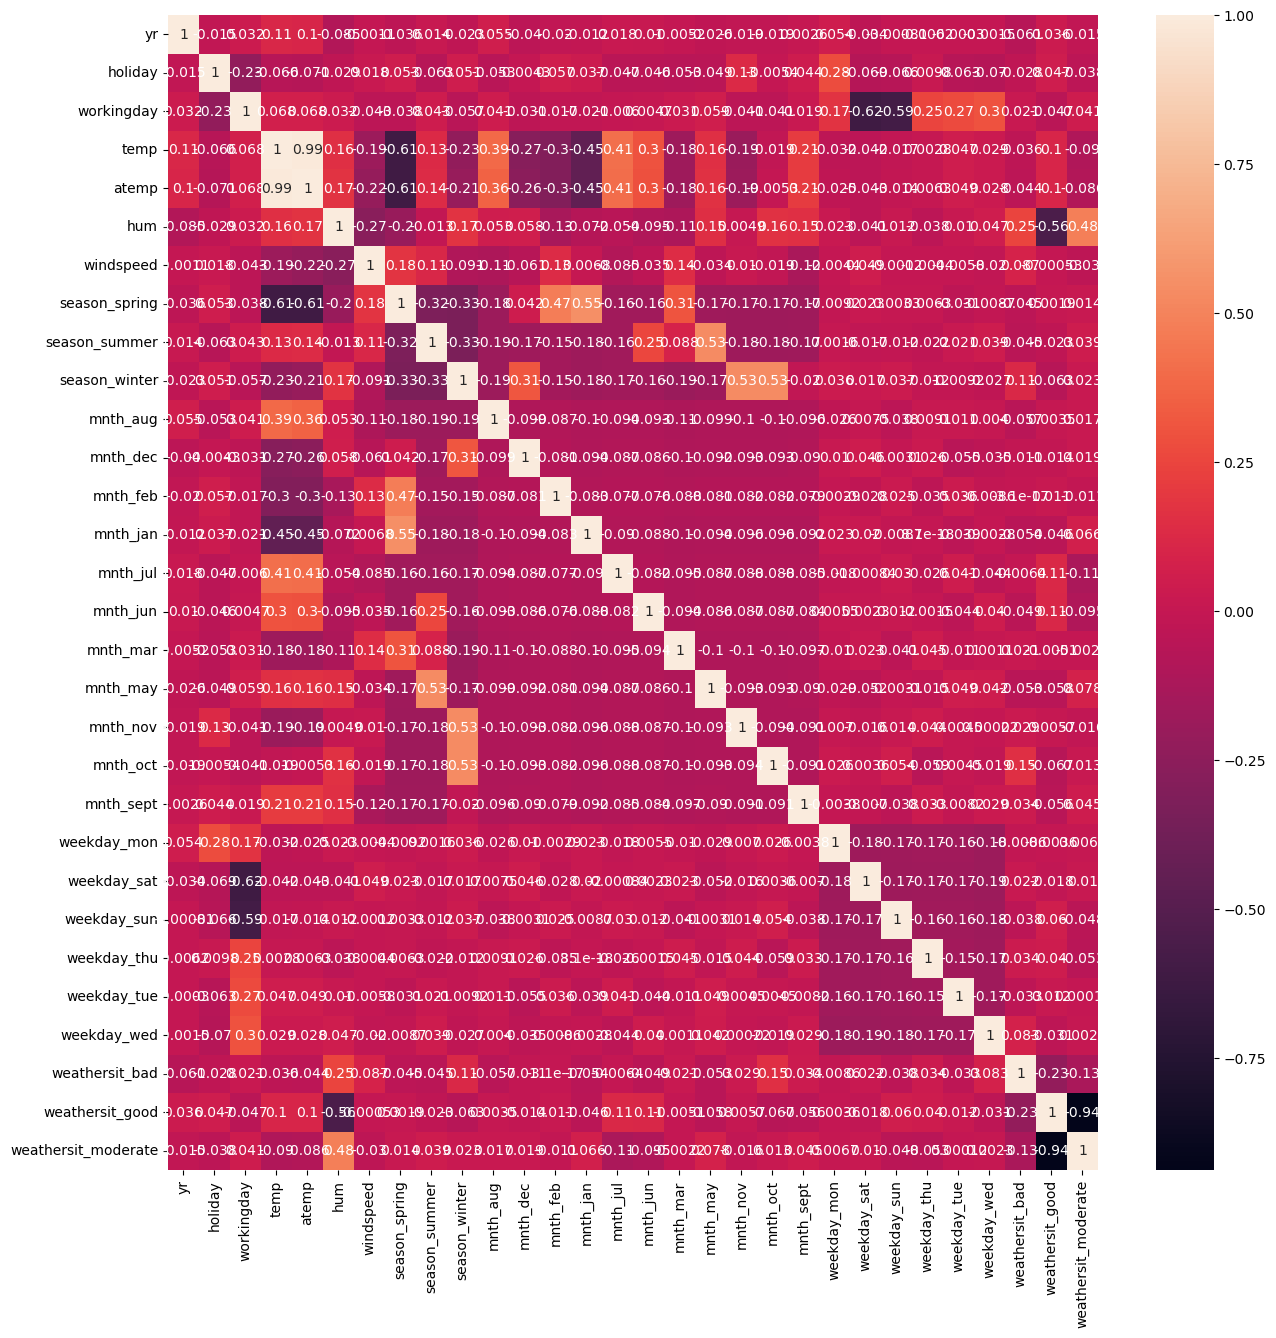

In [1202]:
plt.figure(figsize = (15, 15))  #Checking if the variables are highly correlated
sns.heatmap(X_train.corr(), annot = True)
plt.show()

## Step-5: Build model using RFE

In [1203]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1204]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [1205]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [1206]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 2),
 ('season_winter', True, 1),
 ('mnth_aug', False, 13),
 ('mnth_dec', False, 5),
 ('mnth_feb', False, 6),
 ('mnth_jan', False, 3),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 7),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 14),
 ('mnth_nov', False, 4),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 9),
 ('weekday_wed', False, 15),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [1207]:
### Custom Functions

#Function to build a model using statsmodel api
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

#Function to calculate VIFs
def calculate_vif(X_train, cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))



In [1208]:
    
#Print Columns selected by RFE. We will manually eliminate for these columns
X_train.columns[rfe.support_]



Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [1209]:
rfe_sel_cols = X_train.columns[rfe.support_].tolist()
rfe_sel_cols

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_jul',
 'mnth_sept',
 'weekday_sat',
 'weekday_sun',
 'weathersit_bad',
 'weathersit_good',
 'weathersit_moderate']

In [1210]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['atemp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [1211]:
# Selecting all columns supported by RFE for regression
X_train_rfe = X_train[rfe_sel_cols]

### Model 1

In [1213]:
lm1 = build_model(rfe_sel_cols)
calculate_vif(X_train, rfe_sel_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          3.81e-190
Time:                        20:20:35   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1255    

#### holiday have p-value 0.072 greater than 0.05.


In [1214]:
# Eliminating 'holiday' which p-value 0.072 greater than 0.05. 

X_train_rfe.drop(['holiday'], axis=1, inplace=True)

In [1215]:
rfe_sel_cols.remove('holiday')

print(rfe_sel_cols)

['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_good', 'weathersit_moderate']


### Model -2 

In [1216]:
lm2 = build_model(rfe_sel_cols)
calculate_vif(X_train, rfe_sel_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          3.81e-190
Time:                        20:21:54   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0971    

#### All variables have p-value less than 0.05. So we need to check the VIF value to check collinearity.
VIF > 10 is very high for which variable can be eliminated.


In [1217]:
# Eliminating 'weathersit_good' which has highest VIF which is 14.

X_train_rfe.drop(['weathersit_good'], axis=1, inplace=True)

rfe_sel_cols.remove('weathersit_good')

print(rfe_sel_cols)

['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_moderate']


### Model -3 

In [1218]:
lm3 = build_model(rfe_sel_cols)
calculate_vif(X_train, rfe_sel_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.6
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          3.81e-190
Time:                        20:22:28   Log-Likelihood:                 511.45
No. Observations:                 510   AIC:                            -994.9
Df Residuals:                     496   BIC:                            -935.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2331    

In [1219]:
# All variables have p-value < 0.05. So checking VIF.
# VIF for "hum" is very high 29.19 which is > 10.

X_train_rfe.drop(['hum'], axis=1, inplace=True)

rfe_sel_cols.remove('hum')

print(rfe_sel_cols)

['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_moderate']


### Model -4

In [1220]:
lm4 = build_model(rfe_sel_cols)
calculate_vif(X_train, rfe_sel_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          4.38e-188
Time:                        20:22:56   Log-Likelihood:                 503.75
No. Observations:                 510   AIC:                            -981.5
Df Residuals:                     497   BIC:                            -926.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1536    

In [1221]:
# Eliminating 'workingday' which has high VIF

X_train_rfe.drop(['workingday'], axis=1, inplace=True)

rfe_sel_cols.remove('workingday')

print(rfe_sel_cols)

['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_bad', 'weathersit_moderate']


### Model -5

In [1222]:
lm5 = build_model( rfe_sel_cols)
calculate_vif( X_train, rfe_sel_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.7
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          7.06e-186
Time:                        20:23:16   Log-Likelihood:                 495.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     498   BIC:                            -916.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2546    

In [1223]:
# Eliminating 'weekday_sat' which has p-value 0.182 which is > 0.05

X_train_rfe.drop(['weekday_sat'], axis=1, inplace=True)

rfe_sel_cols.remove('weekday_sat')

print(rfe_sel_cols)

['yr', 'temp', 'windspeed', 'season_spring', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sun', 'weathersit_bad', 'weathersit_moderate']


### Model -6

In [1224]:
lm6 = build_model( rfe_sel_cols)
calculate_vif( X_train, rfe_sel_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.8
Date:                Tue, 15 Aug 2023   Prob (F-statistic):          1.06e-186
Time:                        20:23:33   Log-Likelihood:                 494.79
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     499   BIC:                            -921.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2574    

#### Now as you can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise Model 6 as the final model to proceed with the future predictions.

## Step-6: Residual Analysis of the train data


In [1225]:
rfe_sel_cols

['yr',
 'temp',
 'windspeed',
 'season_spring',
 'season_winter',
 'mnth_jul',
 'mnth_sept',
 'weekday_sun',
 'weathersit_bad',
 'weathersit_moderate']

In [1226]:
X_train_sm = sm.add_constant(X_train_rfe)

In [1227]:
X_train_sm.columns

Index(['const', 'yr', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weekday_sun', 'weathersit_bad',
       'weathersit_moderate'],
      dtype='object')

In [1229]:
y_train_pred = lm6.predict(X_train_sm)

In [1230]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

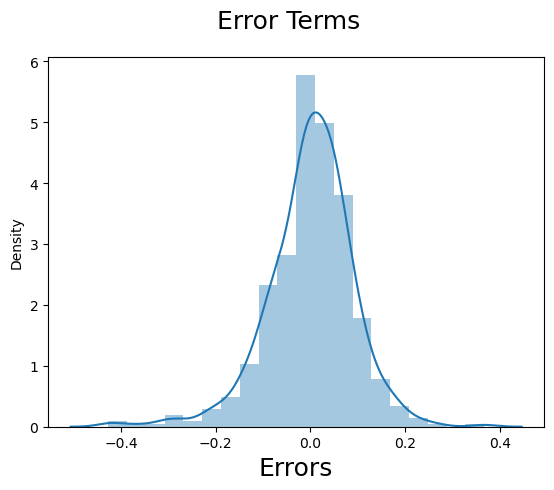

In [1231]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

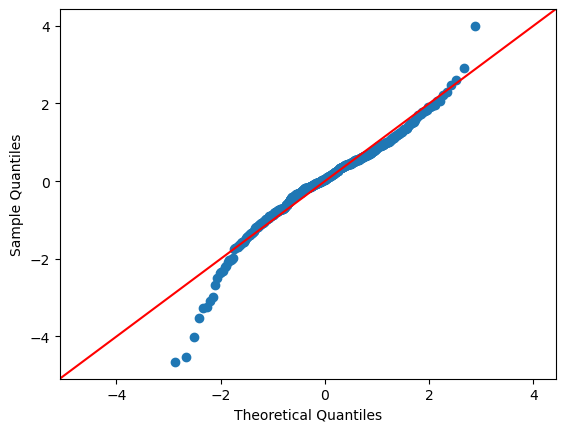

In [1232]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### The plot shows that most of the data points lie on the straight line. This indicates that the error terms are normally distributed .

In [1233]:
from sklearn.metrics import r2_score,mean_squared_error

#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8329253240262527

## Step-7: Making Predictions

In [1234]:
# Apply scaler() to all the columns except the 'categorical variables and dummy variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [1235]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1236]:
X_train_new = X_train_sm.drop(['const'], axis=1)

In [1237]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1238]:
calculate_vif(X_test_new, X_test_new.columns)

               Features    VIF
0                 const  36.85
2                  temp   3.30
4         season_spring   2.91
5         season_winter   1.85
6              mnth_jul   1.40
3             windspeed   1.16
7             mnth_sept   1.13
9        weathersit_bad   1.10
8           weekday_sun   1.05
10  weathersit_moderate   1.04
1                    yr   1.03


In [1239]:
X_test_new.columns

Index(['const', 'yr', 'temp', 'windspeed', 'season_spring', 'season_winter',
       'mnth_jul', 'mnth_sept', 'weekday_sun', 'weathersit_bad',
       'weathersit_moderate'],
      dtype='object')

In [1240]:
#Predicting test data values
y_test_pred = lm6.predict(X_test_new)

## Step-8: Model Evaluation

Text(0, 0.5, 'y_test_pred')

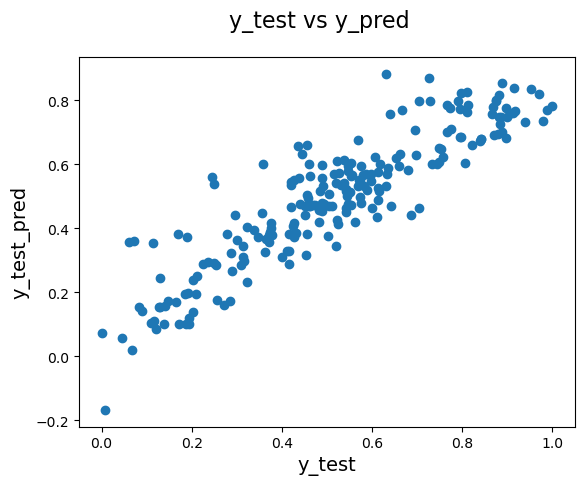

In [1241]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=16)              # Plot heading 
plt.xlabel('y_test', fontsize=14)                          # X-label
plt.ylabel('y_test_pred', fontsize=14)                          # Y-label

In [1242]:
r2_score(y_test, y_test_pred)

0.797334511328224

In [1243]:
param = pd.DataFrame(lm5.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,12))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
2,temp,0.451895
0,const,0.254571
1,yr,0.234754
7,mnth_sept,0.052492
5,season_winter,0.045840
8,weekday_sat,0.015435
9,weekday_sun,-0.041637
6,mnth_jul,-0.070191
11,weathersit_moderate,-0.081138


## Inference

- <b>"temp", "season_winter", "mnth_sept", "weekday_sat" have all positive coefficients which indicates increase in thier values will lead to increase in value of cnt.</b> 

- <b>"weekday_sun", "mnth_jul", "season_spring", "weathersit_moderate", "windspeed", "weathersit_bad" all have negetive coefficients which indicates decrease in their values will lead to decrease in value of cnt.
</b> 

